In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
import os
import sys
import h5py
import json

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp

(1.0, 100.0)

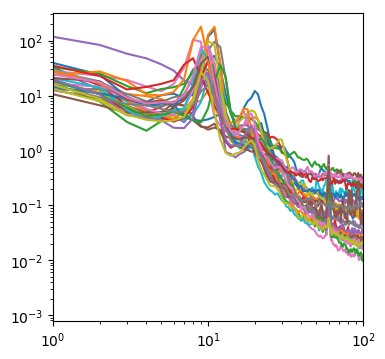

In [35]:
# get all the subject file names in a list
datafolder = '/Users/rgao/Documents/Data/EEGData_Tom/'
subj_list = [i for i in range(1000,1015)]
for i in range(2000,2014):
    subj_list.append(i)

    
keys = ['oz_rest_data','oz_trial_data']
key=keys[0]

# cycle through
for subj in subj_list:
    data = io.loadmat(datafolder+ str(subj) + '.mat', squeeze_me=True)
    x = data[key]
    fs = 500.
    freq, psd = spectral.psd(x, fs, nperseg=int(fs))
    plt.loglog(freq, psd)
    
plt.xlim([1.,100.])

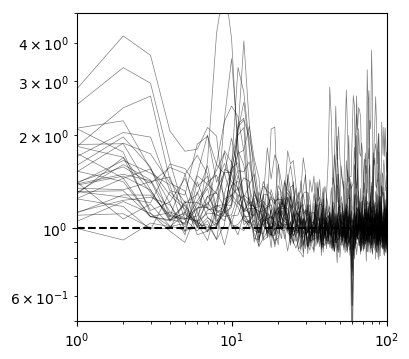

In [36]:
# cycle through
keys = ['oz_rest_data','oz_trial_data']
key=keys[1]

for subj in subj_list:
    data = io.loadmat(datafolder+ str(subj) + '.mat', squeeze_me=True)
    x = data[key]
    fs = 500.
    freq, scv = spectral.scv(x, fs, nperseg=int(fs), outlierpct=2.)
    plt.loglog(freq, scv, 'k', lw=0.5, alpha=0.5)
    
plt.xlim([1.,100.])
plt.ylim([0.5,5])
plt.plot([1, 100], [1, 1], 'k--')

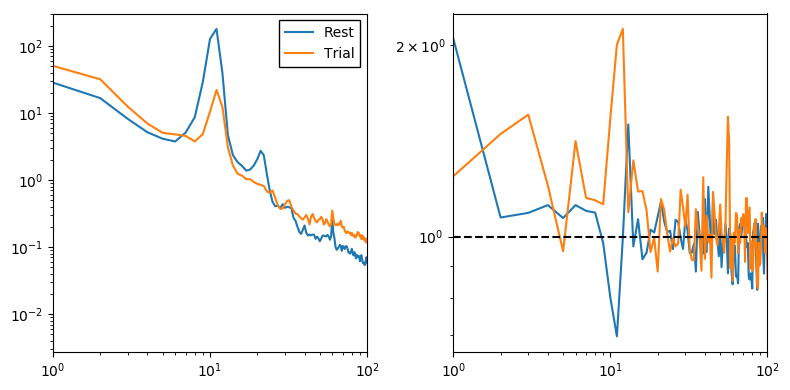

In [23]:
subj = subj_list[11]
data = io.loadmat(datafolder+ str(subj) + '.mat', squeeze_me=True)
fs = 500.
OL=2.

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
freq, psd = spectral.psd(data['oz_rest_data'], fs, nperseg=int(fs))
plt.loglog(freq, psd)
freq, psd = spectral.psd(data['oz_trial_data'], fs, nperseg=int(fs))
plt.loglog(freq, psd)
plt.xlim([1.,100.])
plt.legend(('Rest','Trial'))

plt.subplot(1,2,2)
freq, scv = spectral.scv(data['oz_rest_data'], fs, nperseg=int(fs), outlierpct=OL)
plt.loglog(freq,scv);
freq, scv = spectral.scv(data['oz_trial_data'], fs, nperseg=int(fs), outlierpct=OL)
plt.loglog(freq,scv);
plt.xlim([1.,100.])
plt.plot([1, 100], [1, 1], 'k--')
plt.tight_layout()

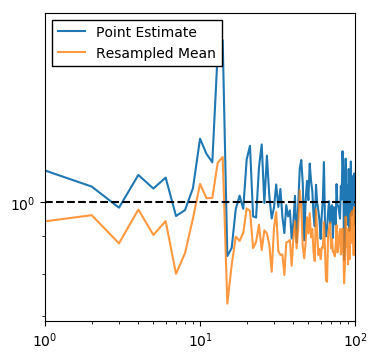

In [10]:
subj = subj_list[0]
data = io.loadmat(datafolder+ str(subj) + '.mat', squeeze_me=True)
x = data['oz_rest_data']
#x = data['oz_trial_data']
freq, scv = spectral.scv(x, fs, nperseg=int(fs), outlierpct=2.)
freq, T, scv_rs = spectral.scv_rs(x, fs, nperseg=int(fs), method='bootstrap', rs_params=(10,100))
plt.loglog(freq,scv);
plt.loglog(freq,np.mean(scv_rs,1), alpha=0.8);
plt.legend(('Point Estimate','Resampled Mean'))
plt.xlim([1.,100.])
plt.plot([1, 100], [1, 1], 'k--')